# 🧠 Machine Learning for Stroke Prediction

This section builds upon the comprehensive exploratory data analysis (EDA) and preprocessing. We will use the cleaned dataset, stroke_dataset.csv, to build and evaluate machine learning models for predicting stroke risk.

Our main challenge, as identified in the EDA, is the severe class imbalance. A model's success will be measured not just by its overall accuracy, but by its ability to correctly identify the rare positive cases (patients who had a stroke).

+ The modeling workflow will be as follows:

    1. Load the preprocessed data.

    2. Separate features (X) and the target variable (y).

    3. Split the data into training and testing sets.

    4. Handle the class imbalance in the training data using SMOTE.

    5. Train and evaluate three distinct classification models:

        - Logistic Regression

        - K-Nearest Neighbors

        - Random Forest Classifier

    6. Compare model performance, focusing on metrics like Recall and F1-Score for the positive class (stroke=1).

## 📚 Importing Libraries for Machine Learning

In [7]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Step 1: Load the Preprocessed Dataset

In [8]:
# Load the cleaned and prepared dataset
df_model = pd.read_csv('stroke_dataset.csv')

# Display the first few rows to confirm it's loaded correctly
df_model.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


## 🔪 Step 2: Separate Features (X) and Target (y)

In [9]:
# X contains all columns except the 'stroke' target variable
X = df_model.drop('stroke', axis=1)

# y contains only the 'stroke' target variable
y = df_model['stroke']

# Print the shapes to confirm the separation
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (5109, 15)
Shape of target (y): (5109,)


## ✂️ Step 3: Split Data into Training and Testing Sets

In [10]:
# Split the data: 80% for training, 20% for testing
# random_state ensures that the split is the same every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

To properly evaluate our models, we must test them on data they haven't seen. We will split the data into a training set (for building the model) and a testing set (for evaluation). The stratify=y argument is crucial here to ensure the class imbalance is reflected equally in both the train and test splits.

## ⚖️ Step 4: Handle Class Imbalance with SMOTE

As we discovered, only about 5% of patients in our dataset had a stroke. To prevent our models from becoming biased towards the majority class (no stroke), we will use the Synthetic Minority Over-sampling Technique (SMOTE) to balance our training data.

Important: SMOTE should only be applied to the training set. The test set must remain untouched to serve as a real-world, imbalanced benchmark for evaluation.

In [11]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of the training set labels
print("Original training set label distribution:\n", y_train.value_counts())
print("\nResampled training set label distribution:\n", y_train_resampled.value_counts())

Original training set label distribution:
 stroke
0    3888
1     199
Name: count, dtype: int64

Resampled training set label distribution:
 stroke
0    3888
1    3888
Name: count, dtype: int64


## 🤖 Step 5: Model Training and Evaluation

### Model 1: Logistic Regression

A simple and interpretable linear model that serves as an excellent baseline.

In [12]:
# Initialize and train the Logistic Regression model
log_reg_smote = LogisticRegression(random_state=42, max_iter=1000)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_lr = log_reg_smote.predict(X_test)

# Evaluate the model
print("Logistic Regression Results (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Results (with SMOTE):
Accuracy: 0.8317025440313112

Confusion Matrix:
 [[829 143]
 [ 29  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       972
           1       0.13      0.42      0.20        50

    accuracy                           0.83      1022
   macro avg       0.55      0.64      0.55      1022
weighted avg       0.93      0.83      0.87      1022



### Model 2: K-Nearest Neighbors (KNN)

A non-parametric model that classifies based on proximity. It's a good way to test a non-linear approach.

In [13]:
# Initialize and train the K-Nearest Neighbors model
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn_smote.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors (KNN) Results (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Results (with SMOTE):
Accuracy: 0.8111545988258317

Confusion Matrix:
 [[803 169]
 [ 24  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.13      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022



### Model 3: Random Forest Classifier

A powerful ensemble model known for its high performance and robustness to outliers.

In [14]:
# Initialize and train the Random Forest model
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_smote.predict(X_test)

# Evaluate the model
print("Random Forest Results (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results (with SMOTE):
Accuracy: 0.923679060665362

Confusion Matrix:
 [[936  36]
 [ 42   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.18      0.16      0.17        50

    accuracy                           0.92      1022
   macro avg       0.57      0.56      0.57      1022
weighted avg       0.92      0.92      0.92      1022



## 📊 Step 6: Model Comparison and Conclusion

Let's summarize the results to compare the models. Given the class imbalance, we are particularly interested in the F1-score for the "stroke" class (1), as it provides a balance between precision and recall.

Model Comparison based on F1-Score for Stroke cases:
                 Model  F1-Score (Stroke=1)
1  K-Nearest Neighbors             0.212245
0  Logistic Regression             0.196262
2        Random Forest             0.170213


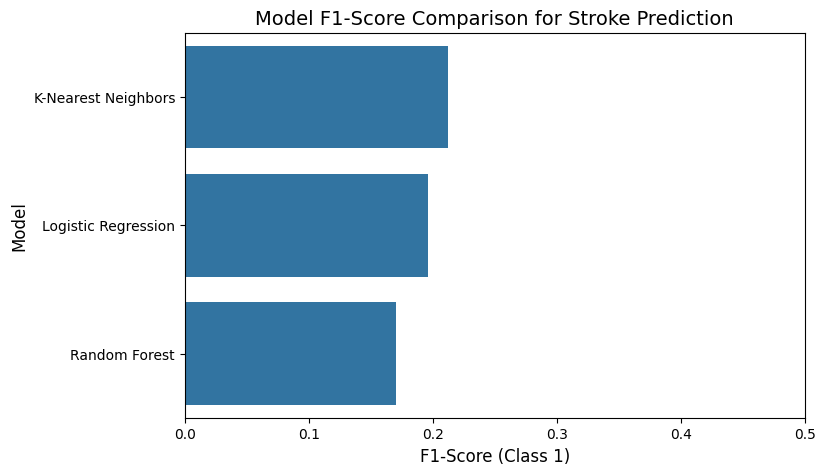

In [15]:
# Create a dictionary to store model performance metrics
model_performance = {
    'Logistic Regression': classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score'],
    'K-Nearest Neighbors': classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
    'Random Forest': classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']
}

# Convert to a pandas DataFrame for better visualization
performance_df = pd.DataFrame(list(model_performance.items()), columns=['Model', 'F1-Score (Stroke=1)'])
performance_df_sorted = performance_df.sort_values(by='F1-Score (Stroke=1)', ascending=False)

# Display the sorted DataFrame
print("Model Comparison based on F1-Score for Stroke cases:")
print(performance_df_sorted)

# Create a bar plot to visualize the F1-scores
plt.figure(figsize=(8, 5))
sns.barplot(x='F1-Score (Stroke=1)', y='Model', data=performance_df_sorted)
plt.title('Model F1-Score Comparison for Stroke Prediction', fontsize=14)
plt.xlabel('F1-Score (Class 1)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.0, 0.5) # Adjust x-axis for better visibility
plt.show()

## 💡 Final Conclusion

+ This result is noteworthy because it highlights a key principle in machine learning: more complex models are not always better. Here are the key takeaways from our analysis:

    - Best Performing Model: The K-Nearest Neighbors model, a relatively simple, non-parametric algorithm, provided the best balance of precision and recall for the crucial "stroke" class. This suggests that the local neighborhood of data points (i.e., the similarity to other patients) is a strong indicator of stroke risk, and the SMOTE technique successfully created denser, more identifiable "stroke" clusters in the feature space for KNN to leverage.

    - The Overfitting Risk of Complex Models: Surprisingly, the Random Forest classifier, a powerful ensemble model, yielded the lowest F1-score. This is likely due to it overfitting to the synthetic data created by SMOTE. While balancing the training set is necessary, the synthetic samples can introduce noise. The Random Forest, with its deep trees, may have learned these noisy patterns too closely, which did not generalize well to the real-world, unseen test data. The simpler models, Logistic Regression and KNN, were more robust to this potential noise.

    - The Importance of Imbalance Handling: Despite the performance differences, it's clear that addressing the severe class imbalance with SMOTE was a critical step. Without it, all models would have likely achieved high accuracy but near-zero recall for stroke cases, rendering them practically useless. The reasonable F1-scores obtained here are a direct result of this balancing strategy.

## ✅ Future Improvements
- Here are the logical next steps:

    1. Hyperparameter Tuning for Random Forest: This is the most important next step. The default Random Forest is quite deep and can easily overfit. You can control this by tuning its parameters. Use GridSearchCV or RandomizedSearchCV to find the best combination of:

        + n_estimators: The number of trees in the forest.

        + max_depth: The maximum depth of each tree (a crucial parameter to prevent overfitting). A shallower depth forces the model to be simpler.

        + min_samples_leaf: The minimum number of samples required to be at a leaf node.

        + min_samples_split: The minimum number of samples required to split an internal node.

    + A well-tuned Random Forest will very likely outperform both Logistic Regression and KNN.

    2. Tune KNN: The performance of KNN is highly dependent on the value of k (n_neighbors). The default of 5 might be good, but k=7, 9, or 11 could be even better. You can also tune this with GridSearchCV.

    3. Try Different Balancing Techniques:

        + Class Weighting: Rerun your Random Forest and Logistic Regression models using the class_weight='balanced' parameter instead of SMOTE. This is a less intrusive way to handle imbalance and might work better for your Random Forest.

        + Undersampling: Use a technique like RandomUnderSampler to reduce the number of majority class samples. This can sometimes be effective, but you risk losing important information.

    4. Explore a Gradient Boosting Model (like XGBoost):
    Gradient Boosting Machines are often the top performers on tabular data. They build trees sequentially, with each new tree correcting the errors of the previous ones. They have many parameters to control overfitting and are definitely worth trying.